# Анализ эффективности системы поддержки принятия решений для согласования медицинских услуг
### Задание

Требуется провести анализ эффективности системы поддержки принятия решений для согласования медицинских услуг между клиникой и страховой компанией и установить факторы, влияющие на корректировки.

**Определение:** Кейс - набор запрашиваемых клиникой медицинских услуг по одному застрахованному с указанием диагнозов и данных по застрахованному

**Определение:** Решение системы по согласованию услуг - отметка TRUE или FALSE, проставляемая системой поддержки принятия решений напротив каждой запрошенной медицинской услуги. TRUE - система подтвердила, что данная услуга может быть оказана по страховке с учетом входных данных. FALSE - система выявила причину, почему данная услуга НЕ может быть оказана по страховке

**Важно:** сейчас все решения системы перепроверяются бизнес-пользователями (сотрудниками страховой компании). Каждое решение системы может быть скорректировано бизнес-пользователем. В данном случае во входных данных проставлена соответствующая отметка

**Определение:** Зеленый кейс - кейс, в котором с большой долей вероятности (более 90%) не будет произведено ни одной корректировки решений по согласованию или отказу, выданных системой поддержки принятия решений

**Что должно быть сделано в рамках задания:**

1. Провести классификация кейсов на Зеленые Кейсы и остальные кейсы (в которых была хотя бы одна корректировка решения системы по согласованию услуг)
2. Установить факторы, влияющие на корректировки и отказы.
3. Дать рекомендации по увеличению числа Зеленых Кейсов


### Описание данных

- service_id - уникальный идентификатор строки данных
- case_id - уникальный идентификатор номера кейса
- name - наименование медицинской услуги
- tooth_num - номера зубов
- count - количество услуг
- approve_result - результат согласования
- decline_reason - причина отказа в согласовании
- mkb - диагноз по МКБ10
- rules_worked - сработавшие правила
- corrected - результат согласования скорректирован
- policy_number - номер полиса застрахованного
- sex - пол застрахованного
- age - возраст застрахованного
- lpu_code - кодировка поликлиники

## Изучение данных из файлов

###  Чтение данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np  # импорт библиотеки numpy
import warnings # импорт библиотеки warnings
import re # импорт библиотеки re
import matplotlib.pyplot as plt # импорт библиотеки mathplotlib
import seaborn as sns # импорт библиотеки seaborn
import itertools # импорт библиотеки itertools
from collections import Counter
# импорт модулей из библиотеки sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier

Загрузим данные из файла.

In [2]:
df = pd.read_excel('task.xlsb') # прочитаем данные из таблицы Excel

Посмотрим на структуру данных и их образец.

In [3]:
df.info() # посмотрим информацию о таблицах
df.head().T # получим образец данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73938 entries, 0 to 73937
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   service_id      73938 non-null  int64 
 1   case_id         73938 non-null  int64 
 2   name            73932 non-null  object
 3   tooth_num       983 non-null    object
 4   count           73938 non-null  int64 
 5   approve_result  73938 non-null  bool  
 6   decline_reason  20448 non-null  object
 7   mkb             72189 non-null  object
 8   rules_worked    21303 non-null  object
 9   corrected       73938 non-null  object
 10  policy_number   73938 non-null  object
 11  sex             73938 non-null  object
 12  age             73938 non-null  int64 
 13  lpu_code        73938 non-null  int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 7.4+ MB


,0,1,2,3,4
service_id,57920,93309,99016,42276,78884
case_id,8421,8421,8421,8297,8297
name,Креатинин,Билирубин прямой,"Регистрация ЭКГ, расшифровка, описание и интер...",Мочевина,Биопсия молочной железы
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1
approve_result,True,True,True,True,True
decline_reason,NaN,NaN,NaN,NaN,NaN
mkb,D64.9 Анемия неуточненная,D64.9 Анемия неуточненная,D64.9 Анемия неуточненная,N11 Хронический тубулоинтерстициальный нефрит;...,N11 Хронический тубулоинтерстициальный нефрит;...
rules_worked,NaN,NaN,NaN,NaN,NaN
corrected,Нет,Нет,Нет,Нет,Нет


В таблице есть пропуски в столбцах `name`, `tooth_num`, `decline_reason`, `mkb`, `rules_worked`. Типы данных во всех столбцах различаются, могут быть оптимизированы.

### Выводы

1. Предварительно можно утверждать, что данных достаточно для решения поставленных задач.
2. В таблице есть пропуски в столбцах `name`, `tooth_num`, `decline_reason`, `mkb`, `rules_worked`. 
3. Типы данных во всех столбцах различаются, могут быть оптимизированы.

## Предобработка данных

### Поиск дубликатов

Проверим таблицу на наличие явных дубликатов.

In [4]:
print('Количество дублирующихся строк в таблице "df":', df.duplicated().sum()) # подсчёт явных дубликатов

Количество дублирующихся строк в таблице "df": 1


Удалим дублирующуюся строку.

In [5]:
df.drop_duplicates(inplace = True) # удалим дублирующуюся строку

Снова поищем дубликаты.

In [6]:
print('Количество дублирующихся строк в таблице "df":', df.duplicated().sum()) # подсчёт явных дубликатов

Количество дублирующихся строк в таблице "df": 0


Дубликаты успешно удалены.

### Обработка пропусков

В таблице есть пропуски в столбцах `name`, `tooth_num`, `decline_reason`, `mkb`, `rules_worked`. 

Очевидно, что поля 'номер зуба', 'причина отказа в согласовании' и 'сработавшие правила' заполняются только в соответствующих случаях - оказания стоматологических услуг, отказа и срабатывания правила. Оставим их без изменения.

Диагноз и наименование услуги важны для анализа, а количество пропусков в этих полях невелико, поэтому удалим строки с пропусками в этих полях.

In [7]:
df = df.dropna(subset=['name', 'mkb']) # удалим пропуски в столбцах `name` и `mkb`

In [8]:
df.info() # посмотрим информацию о таблицах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72187 entries, 0 to 73937
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   service_id      72187 non-null  int64 
 1   case_id         72187 non-null  int64 
 2   name            72187 non-null  object
 3   tooth_num       932 non-null    object
 4   count           72187 non-null  int64 
 5   approve_result  72187 non-null  bool  
 6   decline_reason  19783 non-null  object
 7   mkb             72187 non-null  object
 8   rules_worked    20081 non-null  object
 9   corrected       72187 non-null  object
 10  policy_number   72187 non-null  object
 11  sex             72187 non-null  object
 12  age             72187 non-null  int64 
 13  lpu_code        72187 non-null  int64 
dtypes: bool(1), int64(5), object(8)
memory usage: 7.8+ MB


Пропуски в необходимых для анализа столбцах удалены.

### Выводы

1. Мы удалили дубликаты в строках.
2. Пропуски в необходимых для анализа столбцах удалены.

## Создание таблицы факторов

Для дальнейшего анализа предположим какие факторы помогут определить вероятность корректировки решения. На основании доступных нам данных рассчитаем следующие факторы:    
* Общее количество услуг (n_service)
* Максимальное количество одной услуги в кейсе (max_service)
* Самый редкий диагноз в кейсе (mkb_min_code)
* Самая редкая услуга в кейсе (name_code)
* Пол застрахованного
* Возраст застрахованного
* Код лечебного учреждения
* Вид полиса (pol_codу)
* Количество обращений до данного кейса (n_visit)

Создадим таблицу факторов

In [9]:
features = df.copy() # скопируем таблицу с данными

### Общее количество уникальных услуг и максимальное количество услуги в кейсе

Рассчитаем количество уникальных услуг и максимальное количество услуги в кейсе.

In [10]:
# сгруппируем данные по кейсам и подсчитаем количество уникальных услуг и максимальное количество услуги, результат объединим с факторами
features = pd.merge(features, 
                    features.groupby('case_id').agg({'case_id':'count','count':'max'}).rename({'case_id':'n_service','count':'max_service'}, axis=1).reset_index(), 
                    on='case_id', 
                    how='left')

Посмотрим результат.

In [11]:
features.sample(5).T # выведем пример таблицы

,53336,24877,18215,71220,956
service_id,22160,52565,46722,44813,1146
case_id,36957,20959,17551,47324,8681
name,Д-димер,Глюкоза,АЛТ,Железо сывороточное,Глюкоза
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1
approve_result,False,True,True,False,False
decline_reason,Превышение необходимого объема услуг,NaN,NaN,Нет показаний,Нет показаний
mkb,I83 Варикозное расширение вен нижних конечностей,"L23.9 Аллергический контактный дерматит, причи...",M13.9 Артрит неуточненный,I83.9 Варикозное расширение вен нижних конечно...,N30.0 Острый цистит
rules_worked,32.25.03,525,NaN,80.13; 32.15.01,NaN
corrected,Нет,Да,Нет,Нет,Да


Результат выглядит правдоподобным.

### Самый редкий диагноз

Создадим регулярное выражение для выделения кода диагноза по МКБ

In [12]:
icd10_rx = re.compile(r'[A-Z][0-9][A-Z0-9](?:\.[A-Z0-9]{1,4})?') # регулярное выражение для выделения кода диагноза по МКБ

Для каждого обращения рассчитаем список кодов диагнозов.

In [13]:
features['mkb_list'] = features['mkb'].apply(lambda x: list(re.findall(icd10_rx, str(x)))) # создаем списки кодов диагнозов

Рассчитаем частоту появления диагноза в датасете.

Создадим общий список всех встречающихся диагнозов по кейсам в датасете.

In [14]:
mkb_total_list = features.groupby('case_id').agg({'mkb_list': max})['mkb_list'].values.tolist() # группируем диагнозы по кейсам
mkb_total_list = [x for list in mkb_total_list for x in list] # создаем общий список
len(mkb_total_list) # смотрим количество диагнозов в списке

64165

Создадим словарь с диагнозом и его частотой в списке.

In [15]:
mkb_counter = dict(Counter(mkb_total_list)) # создаем словарь из счетчика
len(mkb_counter) # смотрим размер словаря

2111

Посмотрим начало словаря.

In [16]:
{k: mkb_counter[k] for k in list(mkb_counter)[:10]} # смотрим фрагмент словаря

{'T78.4': 130,
 'N71.1': 48,
 'N72': 635,
 'D25.9': 250,
 'N83.2': 318,
 'N76.0': 704,
 'K86.1': 507,
 'K29.9': 374,
 'M51.9': 2200,
 'M54.2': 1763}

По спискам диагнозов создадим списки частот диагнозов.

In [17]:
features['mkb_code'] = features['mkb_list'].apply(lambda x: [mkb_counter.get(e, e) for e in x]) # по коду диагноза записываем в список его частоту

Оставим самый редкий диагноз в кейсе.

In [18]:
features['mkb_min_code'] = features['mkb_code'].apply(lambda x: np.nan if  x == [] else min(x)) # из списка выбираем минимальную частоту 

Посмотрим результат.

In [19]:
features.sample(5).T # выведем пример таблицы

,68189,19155,56231,19027,52276
service_id,93918,80488,70346,91530,4414
case_id,45119,18092,38567,18017,36394
name,Мазок на флору,Сеанс мануальной терапии,"Эстрадиол (E2, Estradiol)",Антитела к виментину,СОЭ
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,5,1,1,1
approve_result,True,True,False,True,True
decline_reason,NaN,NaN,Нет показаний,NaN,NaN
mkb,D25.9 Лейомиома матки неуточненная;N85.1 Адено...,M54.8 Другая дорсалгия;G44.2 Головная боль нап...,D50.0 Железодефицитная анемия вторичная вследс...,M07.2 Псориатический спондилит (L40.5+);L40 Пс...,E78.9 Нарушения обмена липопротеидов неуточнен...
rules_worked,NaN,804,33.22,NaN,NaN
corrected,Нет,Да,Нет,Нет,Нет


Результат выглядит правдоподобным.

### Самая редкая услуга в кейсе

Рассчитаем частоту с которой услуга встречается в датасете.

In [20]:
(features['name']
            .value_counts()
            .reset_index()
            .rename({'name':'name_code','index':'name'},axis=1))

,name,name_code
0,Общий (клинический) анализ крови развернутый (...,3744
1,Общий анализ мочи (ОАМ),1849
2,АЛТ,1507
3,АСТ,1488
4,Тиреотропный гормон (ТТГ),1338
...,...,...
4926,"ан крови на АТ к аскоридам, АТ к гельминтам( ...",1
4927,Лечение зуба 48 по диагнозу,1
4928,Удаление постоянного 18 зуба,1
4929,"ИФА HBsAg, aHCV, RW",1


In [21]:
name_ref = (features['name']
            .value_counts()
            .reset_index()
            .rename({'name':'name_code','index':'name'},axis=1)) # создадим таблицу с названиями услуг и их частотой                  
features = pd.merge(features, name_ref, on='name', how='left') # запишем частоты услуг в таблицу

Посмотрим результат.

In [22]:
features.sample(5).T # выведем пример таблицы

,16433,26409,12161,3611,66460
service_id,7840844,72456,51008,41057,21154
case_id,16581,21865,14505,10292,44077
name,Электрофорез лекарственный постоянным током (1...,Хламидия трахоматис (Chlamydia trachomatis),Холестерин общий,"Прием, консультация врача-акушера-гинеколога к...",Взятие мазков
tooth_num,NaN,NaN,NaN,NaN,NaN
count,5,1,1,1,1
approve_result,True,False,True,True,True
decline_reason,NaN,Нет показаний,NaN,NaN,NaN
mkb,M23.2 Поражение мениска в результате старого р...,N76.0 Острый вагинит;N84.1 Полип шейки матки,K29.6 Другие гастриты;I11.9 Гипертензивная [ги...,N92.0 Обильные и частые менструации при регуля...,N86 Эрозия и эктропион шейки матки;N92 Обильны...
rules_worked,NaN,7246,NaN,NaN,NaN
corrected,Нет,Нет,Нет,Нет,Нет


Результат выглядит правдоподобным.

### Пол застрахованного

Заменим пол на числовое значение.

Посмотрим варианты значений поля.

In [23]:
features['sex'].value_counts() # подсчитаем число значений

Ж    50413
М    21257
0      499
?       18
Name: sex, dtype: int64

Заменим значения 0 и ? на nan. Возможно их можно восстановить по номеру полиса, если в других кейсах пол указан верно, но мы пока не будем это делать.

In [24]:
features['sex'] = features['sex'].replace({'Ж':0,'М':1,'0':np.nan,'?':np.nan}).astype('Int64') # заменим значения пола

Посмотрим результат.

In [25]:
features.sample(5).T # выведем пример таблицы

,54702,62455,70328,1558,5976
service_id,76043,83949,17700,22965,12183
case_id,37707,41773,46709,9009,11629
name,УЗИ мягких тканей (одна анатомическая зона),Билирубин прямой,"Прием, консультация рефлексотерапевта, первичный",Ферритин,Хламидия пневмонии (Chlamydophila pneumoniae)
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1
approve_result,True,True,True,False,False
decline_reason,NaN,NaN,NaN,Нарушение этапности,Нет показаний
mkb,K21.0 Гастроэзофагеальный рефлюкс с эзофагитом...,K58 Синдром раздраженного кишечника;K21.0 Гаст...,M54 Дорсалгия;M53.0 Шейно-черепной синдром;M54...,E61.1 Недостаточность железа;E03.9 Гипотиреоз ...,N41.1 Хронический простатит;L23 Аллергический ...
rules_worked,NaN,NaN,NaN,2297,1219
corrected,Нет,Нет,Нет,Нет,Нет


Результат выглядит правдоподобным.

### Вид полиса

В названиях полисов можно выделить характерные сочетания, скорее всего это полисы различных компаний. Выделим различные виды полисов. 

In [26]:
string_lst = ['^ПР', '^КСБ', '^008', 'ДМС'] #  создадим список видов компаний
features['pol_type'] = features['policy_number'].str.upper().apply(lambda x: ''.join(re.findall(r"(?=("+'|'.join(string_lst)+r"))", str(x)))) # применим регулярное выражение к названиям кампаний

In [27]:
features.loc[features['pol_type']=='','pol_type'] = 'other' # для остальных полисов введем тип 'other'

In [28]:
features['pol_type'].value_counts()

ПР       67300
008       2216
ДМС       1601
КСБ        857
other      213
Name: pol_type, dtype: int64

На основании типа полиса рассчитаем частоту данного типа в датасете.

In [29]:
pol_ref = (features['pol_type']
            .value_counts()
            .reset_index()
            .rename({'pol_type':'pol_code','index':'pol_type'},axis=1)) # создадим таблицу с названиями услуг и их частотой                  
features = pd.merge(features, pol_ref, on='pol_type', how='left') # запишем частоты полисов в таблицу

Посмотрим результат.

In [30]:
features.sample(5).T # выведем пример таблицы

,41141,38793,7521,15710,67459
service_id,51057,56549,49590,31958,97924
case_id,30533,29290,12347,16190,44591
name,"Узи почек, надпочечников","Узи почек, надпочечников","Прием, консультация травматолога, первичный",Общий белок,АСТ
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1
approve_result,True,True,True,True,False
decline_reason,NaN,NaN,NaN,NaN,Превышение необходимого объема услуг
mkb,N30.2 Другой хронический цистит,K58 Синдром раздраженного кишечника;E83.5 Нару...,;D64.9 Анемия неуточненная,E05 Тиреотоксикоз [гипертиреоз];I11 Гипертензи...,N30.2 Другой хронический цистит;N28.8 Другие у...
rules_worked,NaN,NaN,495,NaN,32.05
corrected,Нет,Нет,Да,Нет,Нет


Результат выглядит правдоподобным.

### Код лечебного учреждения

Рассчитаем частоту ЛПУ.

In [31]:
pol_ref = (features['lpu_code']
            .value_counts()
            .reset_index()
            .rename({'lpu_code':'lpu_code_2','index':'lpu_code'},axis=1)) # создадим таблицу с названиями услуг и их частотой                  
features = pd.merge(features, pol_ref, on='lpu_code', how='left') # запишем частоты полисов в таблицу

Удалим столбец с кодами ЛПУ и заменим его на частоты ЛПУ.

In [32]:
features = features.drop('lpu_code', axis=1).rename({'lpu_code_2':'lpu_code'}, axis=1)

Посмотрим результат.

In [33]:
features.sample(5).T # выведем пример таблицы

,55584,57880,1308,55370,31432
service_id,99914,61894,46793,1532965,80299
case_id,45055,39369,8859,38083,24905
name,АСТ,"Паратиреоидный гормон (Паратгормон, Паратирин,...","Лютеинизирующий гормон (ЛГ, LH)",Электрофорез синусоидальными модулированными т...,Ревматоидный фактор (РФ)
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,5,1
approve_result,True,True,True,True,False
decline_reason,NaN,NaN,NaN,NaN,Превышение необходимого объема услуг
mkb,K86.1 Другие хронические панкреатиты;K29.5 Хро...,E21.3 Гиперпаратиреоз неуточненный;E06.3 ьэх;E...,"N94.8 Другие уточненные состояния, связанные с...",M53.8 Другие уточненные дорсопатии;M53 Другие ...,"M47 Спондилез;M53 Другие дорсопатии, не класси..."
rules_worked,NaN,NaN,NaN,NaN,99.03
corrected,Нет,Нет,Нет,Нет,Нет


Результат выглядит правдоподобным.

### Количество обращений

Рассчитаем число обращений по каждому полису по кейсам.

In [34]:
visits = (df[['case_id','policy_number']].sort_values('case_id')
          .groupby('case_id')
          .agg({'policy_number':min})
          .reset_index()
         ) # сгруппируем данные по кейсам и запишем номера полисов

In [35]:
visits['count'] = visits.apply(lambda row: (visits.iloc[0:row.name]['policy_number'] == 
                                            visits.iloc[row.name]['policy_number']).sum(), axis=1) # посчитаем, сколько владелец полиса обращался по нему до данного кейса

Посмотрим как распределены количества обращений.

In [36]:
visits.value_counts('count') # посчитаем количество обращений

count
0     19420
1      4247
2      1145
3       384
4       146
5        62
6        30
7        12
8         7
13        2
15        2
14        2
11        2
12        2
10        2
9         2
16        1
17        1
18        1
19        1
20        1
21        1
22        1
dtype: int64

Запишем в таблицу факторов число обращений по кейсам.

In [37]:
features = pd.merge(features, 
                    visits[['case_id','count']].rename({'count':'n_visit'}, axis=1), 
                    on='case_id', 
                    how='left') # объединяем таблицы по номеру кейса

Посмотрим результат.

In [38]:
features.sample(5).T # выведем пример таблицы

,25569,19142,3729,10595,21038
service_id,21865,4658833,73630,53737,20798
case_id,21353,18085,10348,13853,18994
name,МРТ плечевого сустава,МРТ гипофиза,УЗИ органов брюшной полости (ОБП),МРТ пояснично-крестцового отдела позвоночника ...,УЗИ коленных суставов
tooth_num,NaN,NaN,NaN,NaN,NaN
count,1,1,1,1,1
approve_result,True,True,True,False,False
decline_reason,NaN,NaN,NaN,Обратите внимание,Нет показаний
mkb,M65 Синовиты и теносиновиты;H92.0 Оталгия,E04.1 Нетоксический одноузловой зоб;E05 Тиреот...,K86.1 Другие хронические панкреатиты;K52 Други...,M51.9 Поражение межпозвоночного диска неуточне...,M42 Остеохондроз позвоночника;I10 Эссенциальна...
rules_worked,218,46588,NaN,5374,2080
corrected,Да,Да,Нет,Нет,Нет


Результат выглядит правдоподобным.

### Наличие корректировки

Посмотрим, как обозначена корректировка в данных.

In [39]:
features['corrected'].value_counts() # подсчитаем количество значений

Нет    59803
Да     12384
Name: corrected, dtype: int64

Заменим текстовые значения на числовые.

In [40]:
features['corrected'].replace({'Нет':0,'Да':1},inplace=True)

### Подготовка таблицы факторов

Посмотрим столбцы таблицы.

In [41]:
features.columns # распечатаем названия столбцов

Index(['service_id', 'case_id', 'name', 'tooth_num', 'count', 'approve_result',
       'decline_reason', 'mkb', 'rules_worked', 'corrected', 'policy_number',
       'sex', 'age', 'n_service', 'max_service', 'mkb_list', 'mkb_code',
       'mkb_min_code', 'name_code', 'pol_type', 'pol_code', 'lpu_code',
       'n_visit'],
      dtype='object')

Удалим лишние столбцы.

In [42]:
features.drop(['count', 'service_id', 'name', 'tooth_num', 'approve_result', 'decline_reason', 'mkb', 'rules_worked', 'policy_number',
        'pol_type', 'mkb_list',  'mkb_code'], axis=1, inplace=True
) # удаляем столбцы

Посмотрим результат.

In [43]:
features.sample(5).T # выведем пример таблицы

,67440,62502,24684,58822,71101
case_id,44587,41797,20833,39811,47250
corrected,0,0,0,1,0
sex,0,0,0,0,1
age,43,26,36,48,37
n_service,3,4,6,1,3
max_service,1,1,1,1,1
mkb_min_code,220.0,297.0,495.0,200.0,58.0
name_code,572,258,704,488,1326
pol_code,67300,67300,67300,67300,67300
lpu_code,17,150,179,302,19619


Остались только нужные столбцы.

### Обработка NaN

Посмотрим, какие остались пропуски в таблице.

In [44]:
features.info() # смотрим пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72187 entries, 0 to 72186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case_id       72187 non-null  int64  
 1   corrected     72187 non-null  int64  
 2   sex           72169 non-null  Int64  
 3   age           72187 non-null  int64  
 4   n_service     72187 non-null  int64  
 5   max_service   72187 non-null  int64  
 6   mkb_min_code  70647 non-null  float64
 7   name_code     72187 non-null  int64  
 8   pol_code      72187 non-null  int64  
 9   lpu_code      72187 non-null  int64  
 10  n_visit       72187 non-null  int64  
dtypes: Int64(1), float64(1), int64(9)
memory usage: 6.7 MB


Пропуски в столбцах `sex` - неверно указанный пол и `mkb_min_code` - отсутствующий диагноз. Нам эти пропуски будут мешать в анализе, поэтому удалим строки с ними. 

In [45]:
features = features.dropna()

In [46]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70629 entries, 0 to 72186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case_id       70629 non-null  int64  
 1   corrected     70629 non-null  int64  
 2   sex           70629 non-null  Int64  
 3   age           70629 non-null  int64  
 4   n_service     70629 non-null  int64  
 5   max_service   70629 non-null  int64  
 6   mkb_min_code  70629 non-null  float64
 7   name_code     70629 non-null  int64  
 8   pol_code      70629 non-null  int64  
 9   lpu_code      70629 non-null  int64  
 10  n_visit       70629 non-null  int64  
dtypes: Int64(1), float64(1), int64(9)
memory usage: 6.5 MB


Пропуски успешно удалены.

Изменим типы всех столбцов на int.

In [47]:
features = features.astype(int)

Сгруппируем факторы по кейсам.

In [48]:
f = features.groupby('case_id').agg({'corrected':'max', 'sex':'max','age':'max', 'lpu_code':'max', 'n_service':'max', 
                                 'max_service':'max', 'mkb_min_code':'min', 'name_code':'min', 'pol_code':'max', 'n_visit':'max'})

In [49]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24752 entries, 8193 to 48209
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   corrected     24752 non-null  int32
 1   sex           24752 non-null  int32
 2   age           24752 non-null  int32
 3   lpu_code      24752 non-null  int32
 4   n_service     24752 non-null  int32
 5   max_service   24752 non-null  int32
 6   mkb_min_code  24752 non-null  int32
 7   name_code     24752 non-null  int32
 8   pol_code      24752 non-null  int32
 9   n_visit       24752 non-null  int32
dtypes: int32(10)
memory usage: 1.1 MB


У нас получилась таблица факторов по 24752 кейсам. Этого должно быть достаточно для анализа.

### Выводы

1. Для дальнейшего анализа мы предположили какие факторы помогут определить вероятность корректировки решения.
2. Для расчетов факторов мы создали таблицу `features`, скопировав исходные данные.
3. На основании доступных нам данных мы рассчитали следующие факторы:
* Общее количество услуг (n_service)
* Максимальное количество одной услуги в кейсе (max_service)
* Самый редкий диагноз в кейсе (mkb_min_code)
* Самая редкая услуга в кейсе (name_code)
* Пол застрахованного
* Возраст застрахованного
* Код лечебного учреждения
* Вид полиса (pol_codу)
* Количество обращений до данного кейса (n_visit)
4. После расчета факторов мы удалили лишние столбцы.
5. Мы обнаружили пропуски в столбцах sex - неверно указанный пол и mkb_min_code - отсутствующий диагноз. Чтобы эти пропуски не мешали в анализе, мы удалили строки с ними.
6. Типы всех столбцов мы изменили на int.
7. Рассчитанные факторы мы сгруппировали по кейсам.
8. У нас получилась таблица факторов по 24752 кейсам. Этого должно быть достаточно для анализа.

##  Исследовательский анализ данных (EDA)

### Изучение статистических характеристик датасета

Изучим средние значения и стандартные отклонения данных в таблице.

In [50]:
f.describe().T # получим статистические характеристики данных

,count,mean,std,min,25%,50%,75%,max
corrected,24752.0,0.283452,0.450683,0.0,0.0,0.0,1.0,1.0
sex,24752.0,0.295572,0.456309,0.0,0.0,0.0,1.0,1.0
age,24752.0,36.580236,12.838836,0.0,30.0,36.0,44.0,88.0
lpu_code,24752.0,6060.116071,8876.949277,1.0,60.0,274.0,19619.0,19619.0
n_service,24752.0,2.853466,3.217799,1.0,1.0,2.0,3.0,43.0
max_service,24752.0,1.718528,2.790027,1.0,1.0,1.0,1.0,57.0
mkb_min_code,24752.0,220.955276,350.985625,1.0,28.0,88.0,235.0,2200.0
name_code,24752.0,256.573772,427.954361,1.0,25.0,119.0,350.0,3744.0
pol_code,24752.0,63359.315288,15588.142005,213.0,67300.0,67300.0,67300.0,67300.0
n_visit,24752.0,0.361547,0.879273,0.0,0.0,0.0,0.0,22.0


Бинарные характеристики при усреднении дали нам процентные значения описываемых величин.

Из статистических характеристик мы можем увидеть следующие свойства клиентов:
* пол: заметно больше женщин - 70%
* средний возраст: 36 лет
* медианное число уникальных услуг: 2
* медианное максимальное количество одной услуги в кейсе: 1
* медианное количество обращений до данного кейса: 0
* корректировки были 28% случаев

Выбросов в значениях не заметно

Из статистических данных видно, что в основном клиенты редко пользуются медицинскими услугами. Большая часть клиентов - женщины. Разброс возрастов невелик - размах от 1 до 3 квартиля всего 14 лет. Доля корректировок говорит о дисбалансе классов в целевом факторе, это необходимо учесть при обучении моделей.

### Сравнение статистических характеристик групп c корректировкой и без

Посмотрим на средние значения факторов в двух группах — где были корректировки и где нет.

In [51]:
f.groupby('corrected').agg(['mean', 'median']).T.rename(columns={0:'No',1:'Yes'})

corrected                      No           Yes
sex          mean        0.291103      0.306870
             median      0.000000      0.000000
age          mean       36.461265     36.880986
             median     36.000000     36.500000
lpu_code     mean     5742.057905   6864.146807
             median    257.000000    381.000000
n_service    mean        2.491881      3.767531
             median      1.000000      2.000000
max_service  mean        1.684935      1.803449
             median      1.000000      1.000000
mkb_min_code mean      221.319802    220.033780
             median     91.000000     83.000000
name_code    mean      286.796967    180.171465
             median    154.000000     80.500000
pol_code     mean    63320.796572  63456.688141
             median  67300.000000  67300.000000
n_visit      mean        0.360284      0.364738
             median      0.000000      0.000000

Из сравнения статистических характеристик мы можем увидеть следующие зависимости:

* пол: корректировки чаще для мужчин
* возраст: нет значимых отличий для групп
* общее количество услуг: чаще корректировки для большего числа услуг
* максимальное количество одной услуги в кейсе: чаще корректировки для большего числа одной услуги
* самый редкий диагноз в кейсе: нет значимых отличий для групп
* самая редкая услуга в кейсе: чаще корректировки для редких услуг
* код лечебного учреждения: чаще корректировки по более загруженным учреждениях
* вид полиса: нет значимых отличий для групп
* количество обращений до данного кейса: нет значимых отличий для групп

### Построение матрицы корреляций

Построим матрицу корреляций и отобразим её.

In [52]:
#построим и отрисуем матрицу корреляций
cm = f.corr() #вычисляем матрицу корреляций

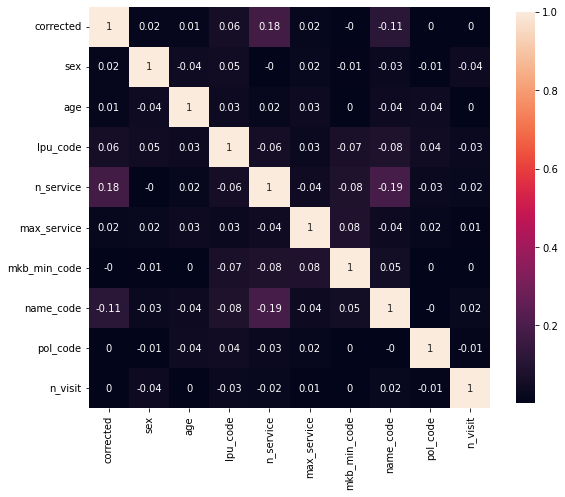

In [53]:
#нарисуем тепловую карту с подписями для матрицы корреляций
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
sns.heatmap(cm.abs(), annot=cm.round(2), square=True, cbar_kws={"shrink": 0.8}) # для удобства восприятия возьмем коэффициенты по модулю, но укажем знак в подписи

plt.show()

Заметные коэффициенты корреляции у общего количество услуг `n_service`:  0.18 и самой редкой услуги в кейсе `name_code`: -0.11. Чуть меньше корреляция популярности ЛПУ `lpu_code`: 0.06. Небольшая положительная корреляция есть у пола и возраста. Остальные коэффициенты практически нулевые.

Есть взаимная корреляция общего количества услуг `n_service` и самой редкой услуги в кейсе `name_code`: -0.19. Корреляция на сильная, поэтому учитывать ее не будем.

### Выводы

1. Мы рассчитали статистику факторов.
Из статистических характеристик мы можем увидеть следующие свойства клиентов:
* пол: заметно больше женщин - 70%
* средний возраст: 36 лет
* медианное число уникальных услуг: 2
* медианное максимальное количество одной услуги в кейсе: 1
* медианное количество обращений до данного кейса: 0
* корректировки были 28% случаев
* выбросов в значениях не заметно

2. Из статистических характеристик мы увидели, что в основном клиенты редко пользуются медицинскими услугами. Большая часть клиентов - женщины. Разброс возрастов невелик - размах от 1 до 3 квартиля всего 14 лет. Доля корректировок говорит о дисбалансе классов в целевом факторе, это необходимо учесть при обучении моделей.

3. Из сравнения статистических характеристик факторов в двух группах — где были корректировки и где нет мы увидели следующие зависимости:

* пол: корректировки чаще для мужчин
* возраст: нет значимых отличий для групп
* общее количество услуг: чаще отказы для большего числа услуг
* максимальное количество одной услуги в кейсе: чаще отказы для большего числа одной услуги
* самый редкий диагноз в кейсе: нет значимых отличий для групп
* самая редкая услуга в кейсе: чаще отказы для редких услуг
* код лечебного учреждения: чаще отказы по более загруженным учреждениях
* вид полиса: нет значимых отличий для групп
* количество обращений до данного кейса: нет значимых отличий для групп

4. Мы построили матрицу корреляции для факторов. Заметные коэффициенты корреляции у общего количество услуг n_service: 0.18 и самой редкой услуги в кейсе name_code: -0.11. Чуть меньше корреляция популярности ЛПУ lpu_code: 0.06. Небольшая положительная корреляция есть у пола и возраста. Остальные коэффициенты практически нулевые. Есть взаимная корреляция общего количества услуг n_service и самой редкой услуги в кейсе name_code: -0.19. Корреляция на сильная, поэтому учитывать ее не будем.

## Анализ с помощью ML моделей

### Сравнение моделей

Разделим наши данные на признаки (матрица X) и целевую переменную (y).

In [54]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = f.drop('corrected', axis=1)
y = f['corrected']

Разделяем данные на обучающую и валидационную выборку.

In [55]:
# разделяем данные на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0 # учитывая дисбаланс классов применим стратифицирование
)

Стандартизируем данные в обучающей и валидационной выборке.

In [56]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [57]:
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Для обучения модели воспользуемся логистической регрессией и случайным лесом.

In [58]:
# зададим список моделей
models = [
    LogisticRegression(solver='liblinear', random_state = 0),
    RandomForestClassifier(n_estimators = 100, random_state = 0)
]

Создадим функцию, принимающую на вход модель и данные и выводящую метрики.

In [59]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_true = y_test
    
    # воспользуемся уже обученной моделью, чтобы сделать прогнозы
    y_proba = model.predict_proba(X_test)[:,1]

    # выведем метрики для полученного прогноза
    print('Метрики классификации')
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Обучим модель на train-выборке, перебирая модели в цикле.

In [60]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print('-'*40)

LogisticRegression(random_state=0, solver='liblinear')
Метрики классификации
	Accuracy: 0.72
	Precision: 0.53
	Recall: 0.07
	F1: 0.13
	ROC_AUC: 0.64
----------------------------------------
RandomForestClassifier(random_state=0)
Метрики классификации
	Accuracy: 0.71
	Precision: 0.49
	Recall: 0.26
	F1: 0.34
	ROC_AUC: 0.69
----------------------------------------


Метрики моделей сопоставимы, посмотрим на коэффициенты моделей для наших факторов.

### Расчет коэффициентов моделей

Посмотрим коэффициенты регрессии, рассчитанные моделью логистической регрессии

In [61]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = f.drop(['corrected'], axis=1)
y = f['corrected']

In [62]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0
)

In [63]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [64]:
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [65]:
model = LogisticRegression(solver='liblinear', random_state = 0)
model.fit(X_train_st, y_train)
y_pred = model.predict(X_test_st)
features_weighted = pd.DataFrame({'name':X.columns})
features_weighted['coefficients'] = model.coef_.T
features_weighted

,name,coefficients
0,sex,0.009840
1,age,0.023428
2,lpu_code,0.139943
3,n_service,0.334982
4,max_service,0.043309
5,mkb_min_code,0.050368
6,name_code,-0.288604
7,pol_code,0.018530
8,n_visit,0.026163


Для сравнения добавим коэффициенты из матрицы корреляции

In [66]:
features_weighted['mc'] = np.array(cm['corrected'].drop(['corrected']))
features_weighted

,name,coefficients,mc
0,sex,0.009840,0.015573
1,age,0.023428,0.014734
2,lpu_code,0.139943,0.056968
3,n_service,0.334982,0.178667
4,max_service,0.043309,0.019144
5,mkb_min_code,0.050368,-0.001651
6,name_code,-0.288604,-0.112288
7,pol_code,0.018530,0.003929
8,n_visit,0.026163,0.002283


Рассчитаем коэффициенты важности для модели Случайный лес.

In [67]:
# Creating Random Forest (rf) model with default values
rf = RandomForestClassifier()

# Fitting model to train data
rf.fit(X_train, y_train)

# Obtaining feature importances
rf.feature_importances_

array([0.02921148, 0.19832617, 0.14673673, 0.0851939 , 0.02466089,
       0.2231929 , 0.23304037, 0.01652527, 0.04311228])

Занесем эти коэффициенты в таблицу.

In [68]:
features_weighted['importances'] = rf.feature_importances_
features_weighted.set_index('name', inplace=True)
features_weighted = features_weighted[['mc', 'coefficients', 'importances']]
features_weighted

,mc,coefficients,importances
name,,,
sex,0.015573,0.009840,0.029211
age,0.014734,0.023428,0.198326
lpu_code,0.056968,0.139943,0.146737
n_service,0.178667,0.334982,0.085194
max_service,0.019144,0.043309,0.024661
mkb_min_code,-0.001651,0.050368,0.223193
name_code,-0.112288,-0.288604,0.233040
pol_code,0.003929,0.018530,0.016525
n_visit,0.002283,0.026163,0.043112


Построим тепловую карту коэффициентов матрицы корреляции и двух ML моделей.

<AxesSubplot:ylabel='name'>

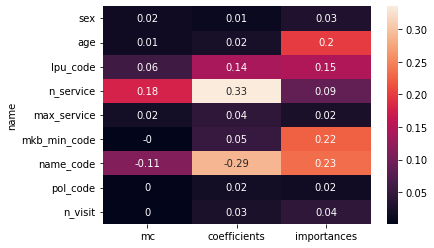

In [69]:
sns.heatmap(features_weighted.abs(), annot=features_weighted.round(2))

Все три способа подтверждают важность факторов общего количество услуг `n_service`, самой редкой услуги в кейсе `name_code` и популярности ЛПУ `lpu_code`. ML модели, в отличии от матрицы корреляции, показывает значимость фактора редкости диагноза - `mkb_min_code`, это стоит учесть. Модель Случайный лес показывает значимость возраста клиента, в то время как другие способы значимости не определяют. В предварительном анализе не будем учитывать этот фактор.

### Выводы

1. Для оценки значимости факторов мы воспользовались моделями логистической регрессии и случайного леса.
2. Мы разделили данные на обучающую и валидационную выборку в соотношении 80 - 20.
3. Мы стандартизировали данные в обучающей и валидационной выборке.
4. Мы создали функцию, принимающую на вход модель и данные и выводящую метрики Accuracy, Precision, Recall, F1, ROC AUC.
5. Мы обучили моделли на train-выборке, перебирая модели в цикле.
6. Мы установили, что метрики моделей сопоставимы и решили использовать обе модели.
7. Мы выведели  коэффициенты моделей для наших факторов и занесли эти коэффициенты в таблицу вместе с коэффициентами корреляции.
8. Сравнив коэффициенты мы установили, что все три способа подтверждают важность факторов общего количество услуг `n_service`, самой редкой услуги в кейсе `name_code` и популярности ЛПУ `lpu_code`. ML модели, в отличии от матрицы корреляции, показывает значимость фактора редкости диагноза - `mkb_min_code`, и решили учесть и этот фактор. Модель Случайный лес показала значимость возраста клиента, но другие способы значимости не определили. Мы решили в предварительном анализе не учитывать этот фактор.

## Выводы и базовые рекомендации по снижению числа корректировок.

**По итогам анализа предоставленных данных мы можем сделать следующие выводы:**
1. На вероятность корректировок влияют факторы общего количество услуг `n_service`, самой редкой услуги в кейсе `name_code` и популярности ЛПУ `lpu_code` и редкости диагноза - `mkb_min_code`.
2. В случае общего количества услуг `n_service` чаще корректировки для большего числа услуг.
3. В случае самой редкой услуги в кейсе `name_code` чаще корректировки для редких услуг.
4. В случае популярности ЛПУ `lpu_code`  чаще корректировки по более загруженным учреждениях.
5. В случае самого редкого диагноза в кейсе `mkb_min_code` выше вероятность корректировки для редкого диагноза.

**Мы можем предложить следующие рекомендации для минимизации корректировок:**
1. Выяснить, как в текущей настройке факторы общего количество услуг `n_service`, самой редкой услуги в кейсе `name_code`, популярности ЛПУ `lpu_code` и редкости диагноза - `mkb_min_code` влияют на принятие решения.
2. Установить ведут ли эти факторы к ложно-отрицательным или ложно-положительным решениям.
3. Скорректировать систему, учитывая влияние факторов.